# This notebook provides interactive widgets to play with the imaging requirements for the SKA1 SDP

## First, do the necessary set-up (run the code block below, first)

In [1]:
""" These first few lines below import the IPython definitions and methods that we will use. 
Please Refer to ipython_api.py for the implementation """
from IPython.html.widgets import interact, interactive, fixed
from IPython.html.widgets.interaction import interact_manual
from IPython.html import widgets
from ipython_api import IPythonAPI as iapi
from parameter_definitions import *
%matplotlib inline

# The lines below define the available telescopes, bands and modes that may be chosen.

available_teles = (Telescopes.SKA1_Low, Telescopes.SKA1_Low_old, Telescopes.SKA1_Mid, Telescopes.SKA1_Mid_old, 
                   Telescopes.SKA1_Sur_old, Telescopes.SKA2_Low, Telescopes.SKA2_Mid)
available_bands = (Bands.Low, 
                   Bands.Mid1, Bands.Mid2, Bands.Mid5A, Bands.Mid5B, 
                   Bands.Sur1)
available_modes = (ImagingModes.Continuum, ImagingModes.Spectral, ImagingModes.SlowTrans)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


## Using default values, we can compare telescopes side-by-side

Dump time:  0.75*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.75*s
Tdump_backward = Min(60.0*s, 0.75*N_facet*s)
Dump time:  0.75*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.75*s
Tdump_backward = Min(60.0*s, 0.75*N_facet*s)
Dump time:  0.6*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.6*s
Tdump_backward = Min(60.0*s, 0.6*N_facet*s)
Dump time:  0.6*s
NOT IMPLEMENTING BASELINE DEPENDENT TIME AVERAGING
Tdump_predict = 0.6*s
Tdump_backward = Min(60.0*s, 0.6*N_facet*s)


Telescope,SKA1_Low_rebaselined,SKA1_Low_old,km
Max Baseline,80,100,
Max # channels,65536,256000,
Optimal Number of Facets,1,1,
Optimal Snapshot Time,79.9,79.9,sec.
Visibility Buffer,23.7,463,PetaBytes
Working (cache) memory,1.47,33.8,TeraBytes
Image side length,74308,208993,pixels
I/O Rate,5.49,26.8,TeraBytes/s
Total Compute Requirement,2.53,31.8,PetaFLOPS
-> Gridding,0.416,13.3,PetaFLOPS


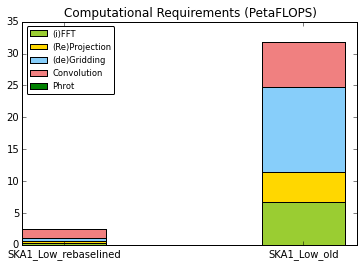

In [2]:
interact_manual(iapi.compare_telescopes_default, 
                Telescope_1=available_teles, Telescope_2=available_teles, Band=available_bands, Mode=available_modes);
#there's a bug here: if we run SKA1 Low rebaslined against Low Old, Nfacet=1 for each but the number of pixels is not
#consistent - suggests that Nfacet=2 for the Rebaselined case. What's going on?

## We can also interactively play with parameters (via sliders)

### The first option is automatic updating of results as the sliders are moved. This may be sluggish

In [4]:
interact(iapi.evaluate_telescope_manual, max_baseline=(10,200), Nf_max = (1,256000,1), Nfacet=(1,10,1), Tsnap=(1.2,1800), 
         Telescope=available_teles, Band=available_bands, Mode=available_modes);

Max Baseline,66 km
Max # of channels,128000
Telescope,SKA1_Low_rebaselined
Band,Low
Mode,Continuum
Tsnap,900.6 sec
Nfacet,5


Visibility Buffer,1.1 PetaBytes
Working (cache) memory,1.1 TeraBytes
Image side length,44139 pixels
I/O Rate,7.03 TeraBytes/s
Total Compute Requirement,4.33 PetaFLOPS
-> Gridding,0.236 PetaFLOPS
-> FFT,0.0084 PetaFLOPS
-> Projection,0.00676 PetaFLOPS
-> Convolution,4.05 PetaFLOPS
-> Phase Rotation,0.0266 PetaFLOPS


### The second option is manual triggering of recompute events (recommended). 

#### This allows more conveniently computing elaborate (slow) optimizations and visualizations per computation, as these are only run when required
#### In this example, *Tsnap and Nfacet* are *automatically* chosen so as to minimize the value of Rflop

Max Baseline,105 km
Max # of channels,128000
Telescope,SKA1_Mid_rebaselined
Band,Mid2
Mode,Spectral


Evaluating Nfacets = 1
Tsnap has been optimized as : 475.683968. (Cost function = 11.303048)
Evaluating Nfacets = 2
Tsnap has been optimized as : 1076.917153. (Cost function = 5.493373)
Evaluating Nfacets = 3
Tsnap has been optimized as : 1568.913677. (Cost function = 4.434633)
Evaluating Nfacets = 4
Tsnap has been optimized as : 1951.289832. (Cost function = 4.414478)
Evaluating Nfacets = 5
Tsnap has been optimized as : 2256.348513. (Cost function = 4.860608)

Expression increasing with number of facets; aborting exploration of Nfacets > 5

4.414478 PetaFLOPS was the lowest FLOP value, found for (Nfacet, Tsnap) = (4, 1951.29)


Optimal Number of Facets,4
Optimal Snapshot Time,1.95e+03 sec.
Visibility Buffer,64.1 PetaBytes
Working (cache) memory,6.61 TeraBytes
Image side length,128008 pixels
I/O Rate,59.3 TeraBytes/s
Total Compute Requirement,4.41 PetaFLOPS
-> Gridding,1.03 PetaFLOPS
-> FFT,0.791 PetaFLOPS
-> Projection,0.573 PetaFLOPS
-> Convolution,1.87 PetaFLOPS


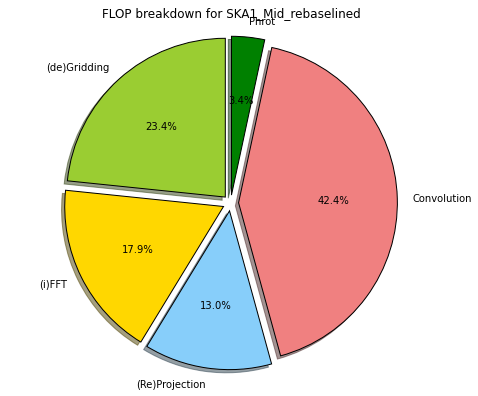

In [3]:
interact_manual(iapi.evaluate_telescope_optimized, max_baseline=(10,200), Nf_max = (1,256000,1), Telescope=available_teles, 
         Band=available_bands, Mode=available_modes);